# **The Simple Pendulum Problem**
In this week’s session, we dive into the general formulation of ordinary differential equations (ODEs) and their applications in classical mechanics. We focus on one of the most iconic nonlinear systems in physics: the simple pendulum.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## **Simple Pendulum Equations**
The equation of motion of a simple pendulum of length $L$ and mass $m$ under the influence of gravity $g$ is:

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L} \sin\theta = 0
$$

where $\theta(t)$ is the angular displacement from the vertical.

This is a second-order nonlinear ODE. It cannot be solved analytically in closed form for arbitrary angles. However, in the small-angle limit ($\theta \ll 1$), we can use the approximation $\sin\theta \approx \theta$, yielding:

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L} \theta = 0
$$

This is the standard form of a simple harmonic oscillator, whose solution is:

$$
\theta(t) = \theta_0 \cos\left(\sqrt{\frac{g}{L}} t\right)
$$

with $\theta_0$ being the initial angle.

## **Numerical Solution**


This function evaluates the right-hand side (RHS) of a system of coupled first-order ODEs that describe the nonlinear motion of a simple pendulum (no damping, no driving).

Physics Background

The equation of motion for a simple pendulum of length $L$ and mass $m$ under gravity $g$ is:

$$
\frac{d^2 \theta}{dt^2} + \frac{g}{L} \sin \theta = 0
$$

This is a second-order nonlinear ODE due to the $\sin\theta$ term.

Rewriting as a System of First-Order ODEs

We define:

•	$\theta$ = angular displacement

•	$\omega = \frac{d\theta}{dt}$ = angular velocity

So the system becomes:

$$
\begin{aligned}
\frac{d\theta}{dt} &= \omega \
\frac{d\omega}{dt} &= -\frac{g}{L} \sin \theta
\end{aligned}
$$

If we non-dimensionalise time using $t’ = t \sqrt{g/L}$, the coefficient simplifies to a constant:

$$
\frac{d\omega}{dt} = -4\pi^2 \sin \theta
$$

In [7]:
"""
    rhs_pend: Evaluate the right hand side of the coupled (non-
        dimensional) ODEs describing the nonlinear pendulum
    
    ---INPUT:
    x - the current value of the dependent variable. For the pendulum
        ODEs x = [theta omega] where theta is the angle and omega is the
        angular velocity.
        
    ---OUTPUT:
    rhs - a row vector representing the value of the right hand side
        of the ODEs. Specifically, rhs=[omega -4*pi^2*sin(theta)].
    -------------------------------------------------------------------------------
    """
def rhs_pend(x):
    rhs = np.zeros(2)
    theta = x[0];
    omega = x[1];
    rhs[0] = omega;
    rhs[1] = -4*np.pi**2*np.sin(theta)
    
    return rhs

### **Variables*
•	$ \tau $ is the time step for integration.

•	$ T $ is the total simulation time.

•	$ \text{numSteps} = T / \tau $ determines the number of integration steps.

### **Initial Conditions**
•	Initial angular displacement: $50^\circ$

•	Angular velocity is initially zero: $\omega(0) = 0$

•	The state vector is $x = [\theta, \omega]$


In [8]:
#-------------------------------------------------------------------------------
# Time grid parameters:
tau = 0.05  # Time step
T = 8  # Total integration time
numSteps = int(np.ceil(T/tau))  # Number of time steps

#-------------------------------------------------------------------------------
# Initial conditions
theta1 = 50  # Initial angle in degrees
theta = theta1*np.pi/180
x = np.array([theta, 0])

#-------------------------------------------------------------------------------
# Preallocate:
time = np.arange(numSteps+1)*tau

# Arrays to store pendulum positions
xPendArray = np.zeros((numSteps+1, 2))
yPendArray = np.zeros((numSteps+1, 2))

# Initial position
xPendArray[0] = [0, np.sin(x[0])]
yPendArray[0] = [0, -np.cos(x[0])]




RK4 is used to numerically integrate the coupled ODEs:

•	$\frac{d\theta}{dt} = \omega$

•	$\frac{d\omega}{dt} = -4\pi^2 \sin(\theta)$

Each RK4 step evaluates the RHS at four different points and takes a weighted average.



And you want to update this using RK4 with time step $\tau$.

The steps are:
1.	First estimate (at beginning of the interval):
$
\mathbf{f}_1 = f(\mathbf{x}_n) =
$

\begin{bmatrix}
\omega_n \\
-4\pi^2 \sin(\theta_n)
\end{bmatrix}

2.	Second estimate (halfway using $\mathbf{f}_1$):

$
\mathbf{f}_2 = f\left(\mathbf{x}_n + \frac{\tau}{2} \mathbf{f}_1\right)
$

3.	Third estimate (again halfway using $\mathbf{f}_2$):

$
\mathbf{f}_3 = f\left(\mathbf{x}_n + \frac{\tau}{2} \mathbf{f}_2\right)
$

4.	Fourth estimate (end of the interval):

$
\mathbf{f}_4 = f\left(\mathbf{x}_n + \tau \mathbf{f}_3\right)
$

5.	Update the state:

$
\mathbf{x}_{n+1} = \mathbf{x}_n + \frac{\tau}{6} \left( \mathbf{f}_1 + 2\mathbf{f}_2 + 2\mathbf{f}_3 + \mathbf{f}_4 \right)
$

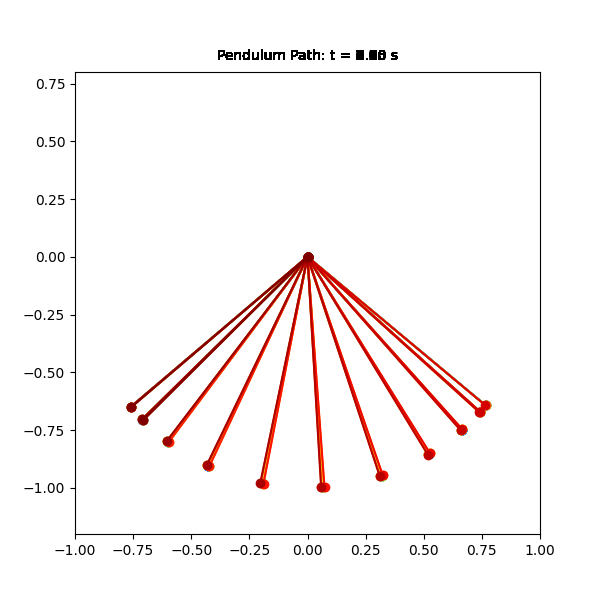

In [9]:
#-------------------------------------------------------------------------------
# Fourth-order Runge-Kutta integration
for n in range(numSteps):
    
    # One step of RK4
    f1 = rhs_pend(x)
    f2 = rhs_pend(x + 0.5*tau*f1)
    f3 = rhs_pend(x + 0.5*tau*f2)
    f4 = rhs_pend(x + tau*f3)
    x = x + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    
    # Update the pendulum position:
    # Co-ordinates of the pendulum bar
    xPendArray[n+1] = [0, np.sin(x[0])]
    yPendArray[n+1] = [0, -np.cos(x[0])]


#-------------------------------------------------------------------------------
# Plot the results as an animation

%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 0.8])

# Plot pendulum paths with rainbow colors
artists = []
colors = plt.cm.jet(np.linspace(0, 1, numSteps))

for i in range(numSteps):
            
    plot,  = ax.plot(xPendArray[i], yPendArray[i], 'o-', color=colors[i]) # Plot pendulum positions
    
    title = ax.text(0, 0.85, f'Pendulum Path: t = {time[i]:.2f} s', ha='center')
    
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=80, repeat=False)
plt.show()
# Change interval value to speed up or slow down animation

## **Comparing Angle and Energy**

## Equations Used in the Pendulum Simulation

The motion of a simple pendulum (without damping or external forcing) is governed by the system of nonlinear ordinary differential equations (ODEs):

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -4\pi^2 \sin(\theta)
$$

Where:
- $\theta$ is the angle (in radians) the pendulum makes from the vertical.
- $\omega$ is the angular velocity.

---

### Total Mechanical Energy

The total mechanical energy $E$ of the pendulum is given by the sum of kinetic and potential energy:

$$
E(t) = K(t) + U(t)
$$

- Kinetic energy:
  $$
  K(t) = \frac{1}{2} \omega^2
  $$

- Potential energy (relative to the lowest point of swing):
  $$
  U(t) = 4\pi^2 (1 - \cos\theta)
  $$

Thus, the total energy becomes:

$$
E(t) = \frac{1}{2} \omega^2 + 4\pi^2 (1 - \cos\theta)
$$

---

### Purpose of the Comparison

- **Angle $\theta(t)$**: Shows how the pendulum oscillates over time using both Euler and Runge-Kutta 4th order (RK4) methods.
- **Energy $E(t)$**: Used to assess the conservation of energy, a key indicator of the accuracy and stability of the numerical integration method.

- RK4 maintains energy conservation much better over time, while the Euler method introduces drift due to its lower-order accuracy.

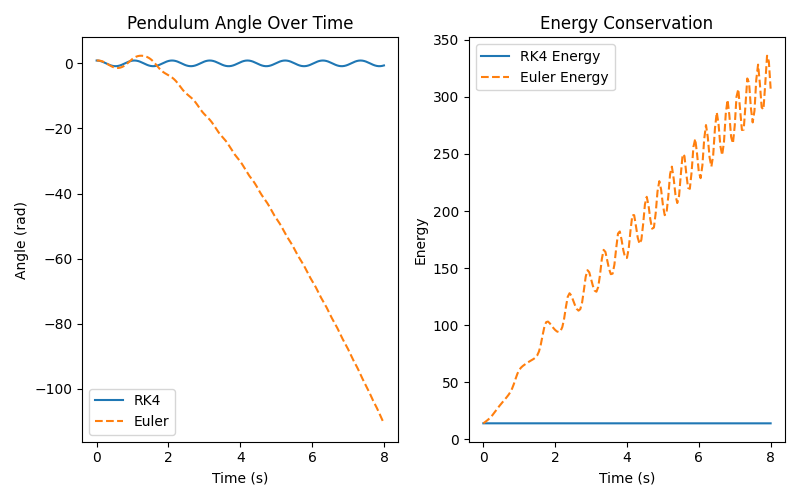

In [10]:

# Define parameters
tau = 0.05  # Time step
T = 8       # Total integration time
numSteps = int(np.ceil(T / tau))
time = np.arange(numSteps + 1) * tau

# Initial conditions
theta0_deg = 50
theta0 = np.radians(theta0_deg)
x0 = np.array([theta0, 0.0])  # [theta, omega]

# Define RHS of the pendulum ODEs
def rhs_pend(x):
    theta, omega = x
    dtheta_dt = omega
    domega_dt = -4 * np.pi**2 * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# Function to compute energy
def pendulum_energy(x):
    theta, omega = x
    kinetic = 0.5 * omega**2
    potential = 4 * np.pi**2 * (1 - np.cos(theta))
    return kinetic + potential

# Runge-Kutta 4th Order
x_rk = x0.copy()
rk_data = [x_rk.copy()]
rk_energy = [pendulum_energy(x_rk)]

for _ in range(numSteps):
    f1 = rhs_pend(x_rk)
    f2 = rhs_pend(x_rk + 0.5 * tau * f1)
    f3 = rhs_pend(x_rk + 0.5 * tau * f2)
    f4 = rhs_pend(x_rk + tau * f3)
    x_rk = x_rk + (tau / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    rk_data.append(x_rk.copy())
    rk_energy.append(pendulum_energy(x_rk))

# Euler Method
x_euler = x0.copy()
euler_data = [x_euler.copy()]
euler_energy = [pendulum_energy(x_euler)]

for _ in range(numSteps):
    f = rhs_pend(x_euler)
    x_euler = x_euler + tau * f
    euler_data.append(x_euler.copy())
    euler_energy.append(pendulum_energy(x_euler))

# Convert to numpy arrays
rk_data = np.array(rk_data)
euler_data = np.array(euler_data)
rk_energy = np.array(rk_energy)
euler_energy = np.array(euler_energy)

# Plot theta over time
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(time, rk_data[:, 0], label="RK4")
plt.plot(time, euler_data[:, 0], label="Euler", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.title("Pendulum Angle Over Time")
plt.legend()

# Plot energy over time
plt.subplot(1, 2, 2)
plt.plot(time, rk_energy, label="RK4 Energy")
plt.plot(time, euler_energy, label="Euler Energy", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.title("Energy Conservation")
plt.legend()
plt.tight_layout()
plt.show()